<a href="https://colab.research.google.com/github/Chethu7781/-bhxfnr-/blob/master/EDA1_titanicDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('titanic_train.csv')

In [3]:
df.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0


In [4]:
df.isnull()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,False,False,False,False,True,False,False,False,False,True,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,True,False,True,True,False,False
2,False,False,False,False,False,False,False,False,False,True,False,True,True,True,False
3,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,True,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
846,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
847,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False
848,False,False,False,False,False,False,False,False,False,True,False,True,True,True,False


<Axes: >

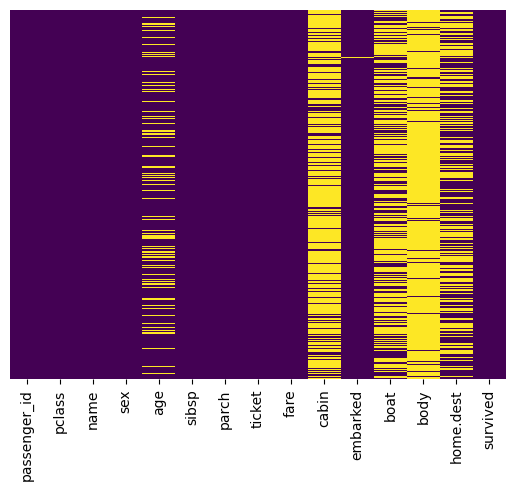

In [5]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [6]:
df = df.drop(['body', 'boat', 'cabin', 'home.dest'], axis=1)
df.columns

Index(['passenger_id', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'embarked', 'survived'],
      dtype='object')

<Axes: xlabel='survived', ylabel='count'>

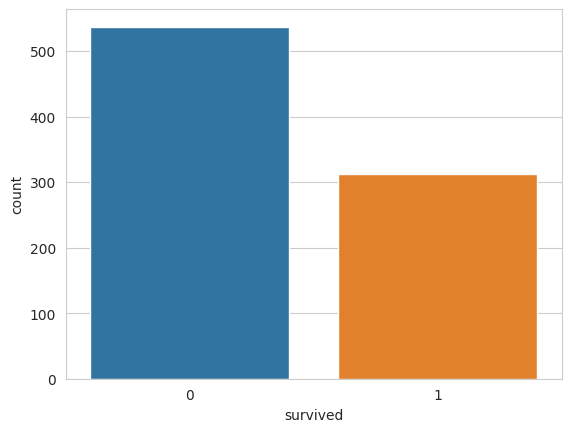

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='survived', data=df)

<Axes: xlabel='survived', ylabel='count'>

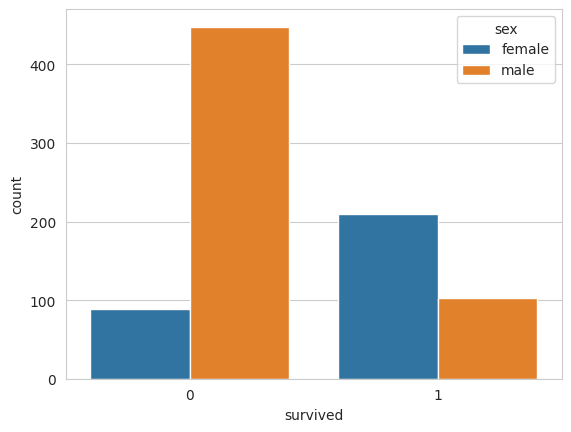

In [8]:
sns.countplot(x='survived', data=df, hue='sex')

<Axes: xlabel='survived', ylabel='count'>

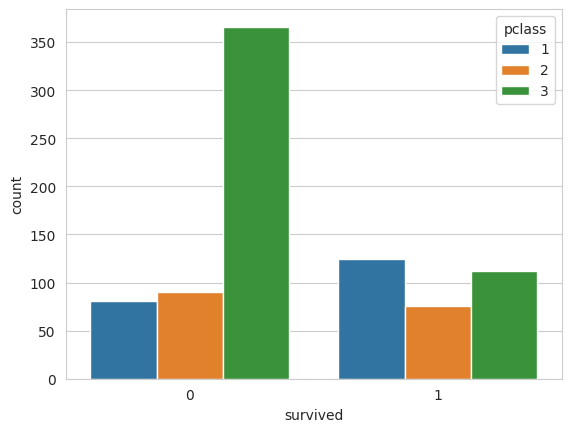

In [9]:
sns.countplot(x='survived', data=df, hue='pclass')

<ipython-input-10-1031a98a8d6c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'].dropna(), kde=False, color='darkred')


<Axes: xlabel='age'>

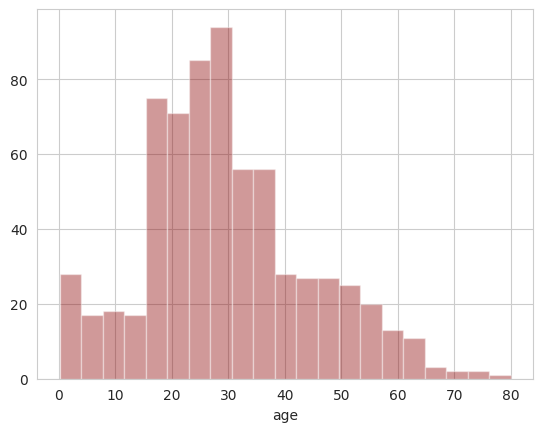

In [10]:
sns.distplot(df['age'].dropna(), kde=False, color='darkred')

<Axes: xlabel='pclass', ylabel='age'>

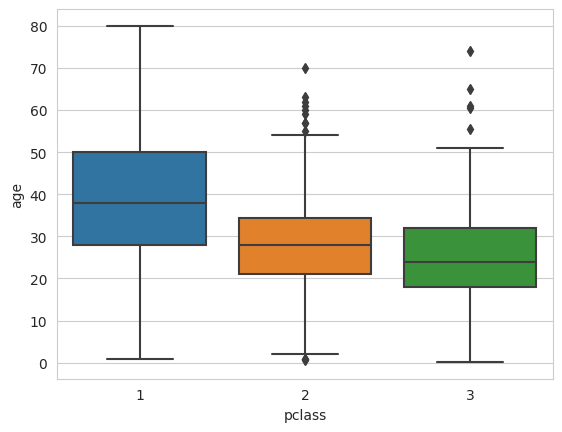

In [11]:
sns.boxplot(x=df['pclass'], y=df['age'])

In [12]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age


In [13]:
df['age'] = df[['age','pclass']].apply(impute_age,axis=1)


<Axes: >

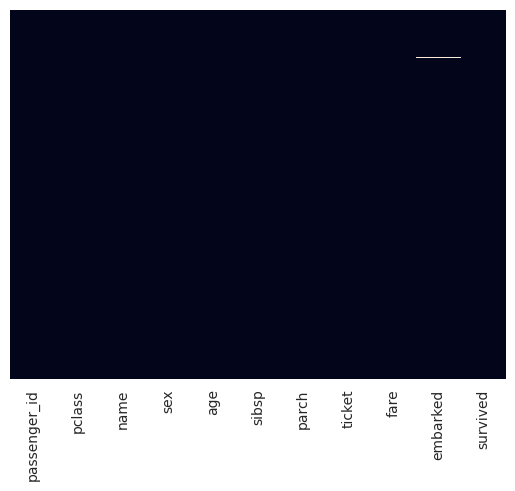

In [14]:
# df['age'].isnull().sum()
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

In [15]:
mean_value = df['embarked'].mode()

In [16]:
mean_value

0    S
Name: embarked, dtype: object

In [20]:
df.dropna(inplace=True)

In [23]:
sex = pd.get_dummies(df['sex'],drop_first=True)
embark = pd.get_dummies(df['embarked'],drop_first=True)

In [27]:
df.drop(['sex','embarked','name','ticket'],axis=1,inplace=True)

In [29]:
train_data = pd.concat([df, sex, embark], axis=1)

In [30]:
train_data.head()

,passenger_id,pclass,age,sibsp,parch,fare,survived,male,Q,S
0,1216,3,24.0,0,0,7.7333,1,0,1,0
1,699,3,38.0,0,0,8.6625,0,1,0,1
2,1267,3,30.0,1,1,24.1500,0,0,0,1
3,449,2,54.0,1,3,23.0000,1,0,0,1
4,576,2,40.0,0,0,13.0000,0,1,0,1


In [31]:
train_data.drop(['survived'], axis=1)

,passenger_id,pclass,age,sibsp,parch,fare,male,Q,S
0,1216,3,24.0,0,0,7.7333,0,1,0
1,699,3,38.0,0,0,8.6625,1,0,1
2,1267,3,30.0,1,1,24.1500,0,0,1
3,449,2,54.0,1,3,23.0000,0,0,1
4,576,2,40.0,0,0,13.0000,1,0,1
...,...,...,...,...,...,...,...,...,...
845,158,1,55.0,0,0,50.0000,1,0,1
846,174,1,58.0,0,0,29.7000,1,0,0
847,467,2,24.0,1,0,26.0000,0,0,1
848,1112,3,3.0,1,1,13.7750,0,0,1


In [32]:
train_data['survived']

0    1
1    0
2    0
3    1
4    0
Name: survived, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, y_test = train_test_split(train_data.drop(['survived'], axis=1), train_data['survived'], test_size=0.3, random_state=42)



##Training and Predicting

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
logmodel = LogisticRegression()
logmodel.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
predictions = logmodel.predict(X_test)

In [40]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

accuracy = confusion_matrix(y_test, predictions)
accuracy

array([[137,  23],
       [ 29,  66]])

In [39]:
accuracy=accuracy_score(y_test,predictions)
accuracy

0.796078431372549